In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import json

In [2]:
input_file = '/home/kimino/soft/qcm-detector/results_2.json'
with open(input_file, 'r') as file:
    json_data = json.loads(file.read())

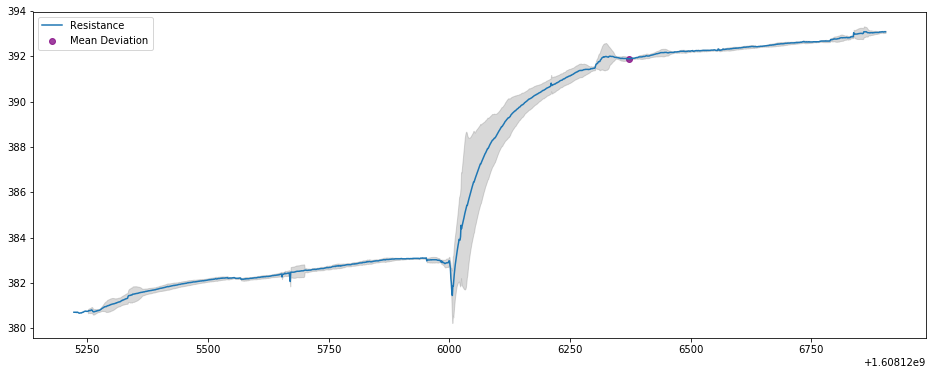

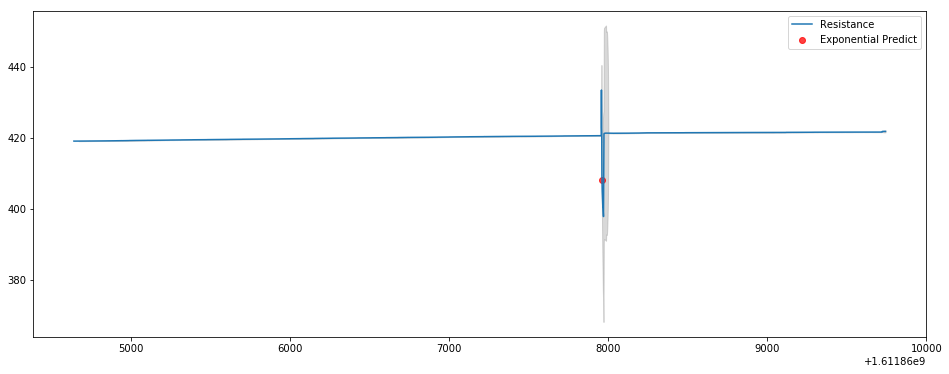

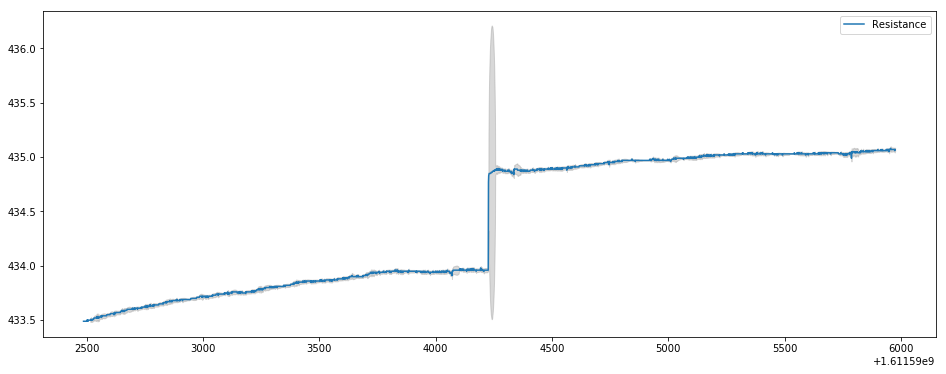

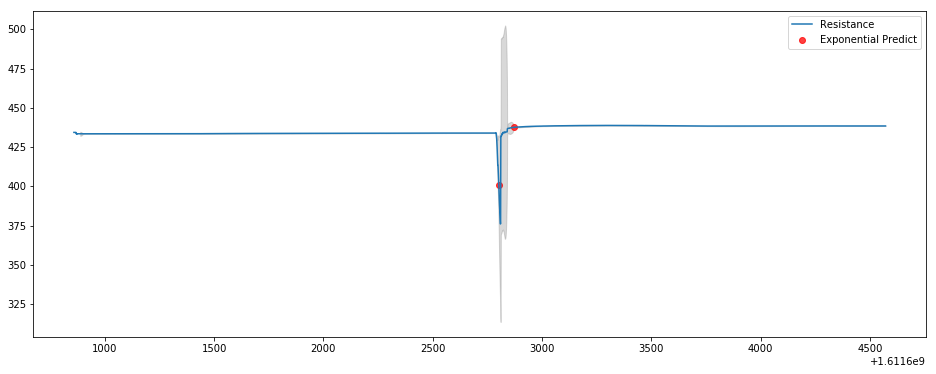

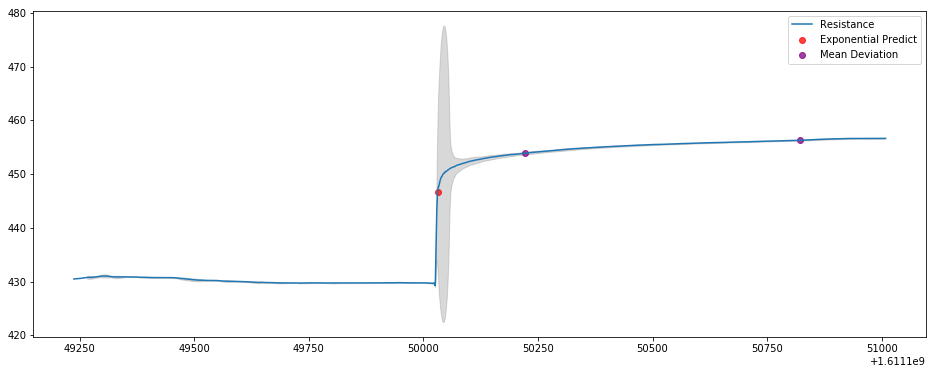

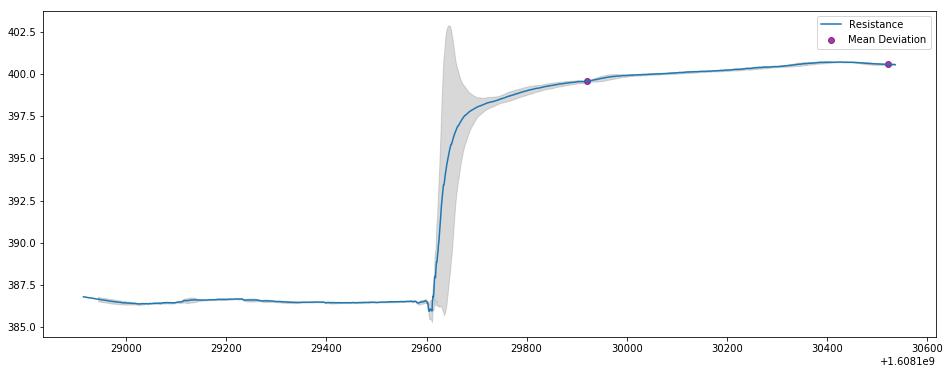

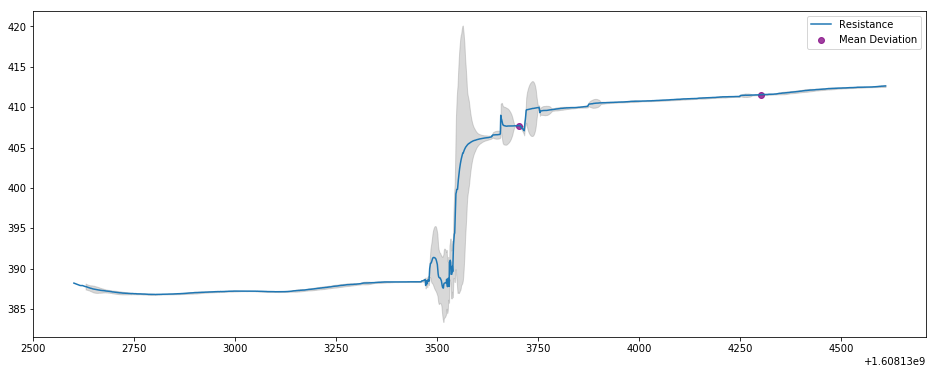

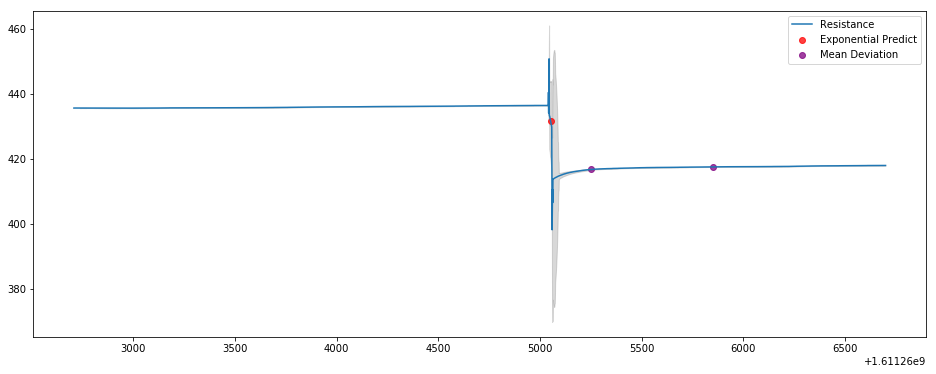

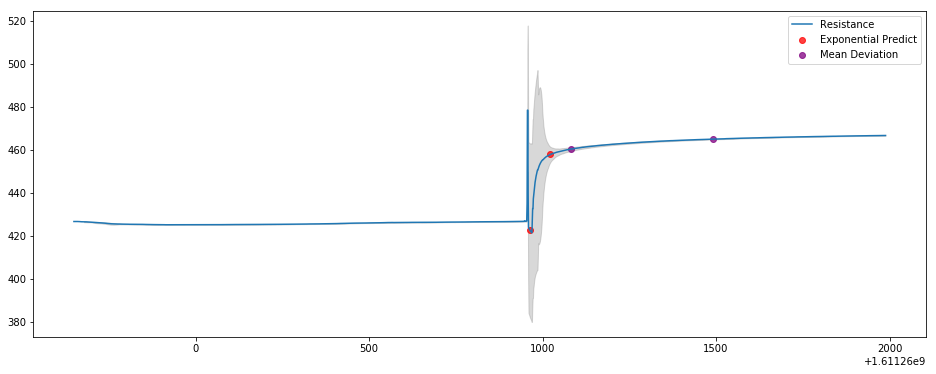

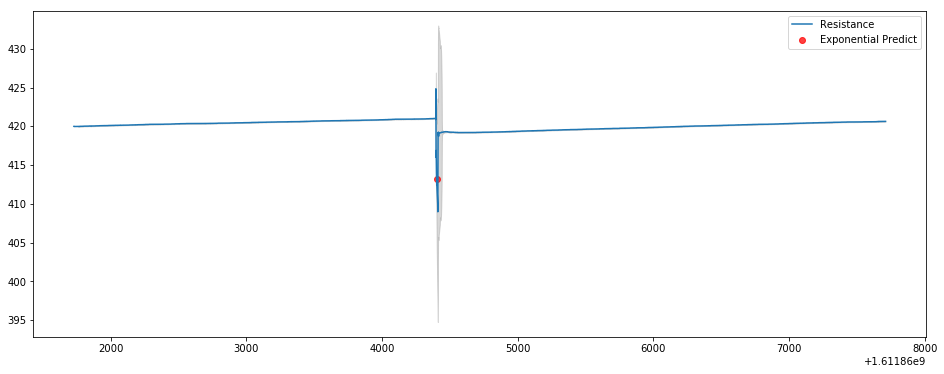

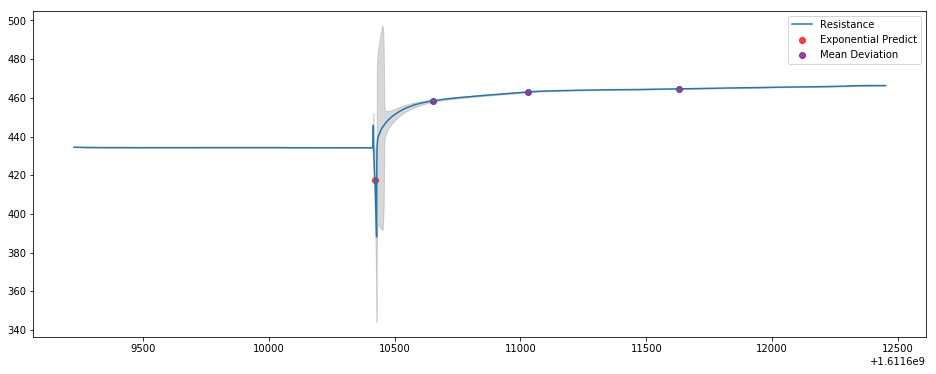

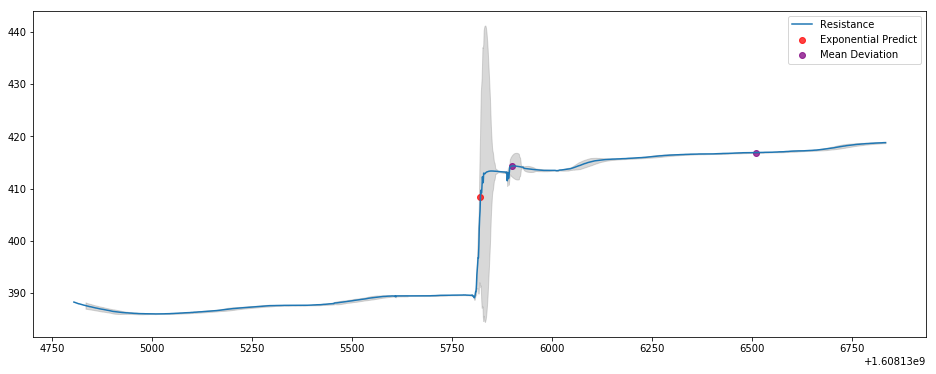

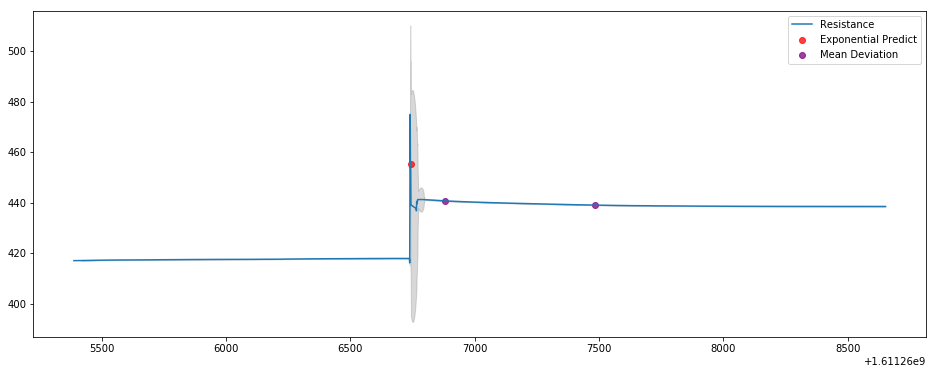

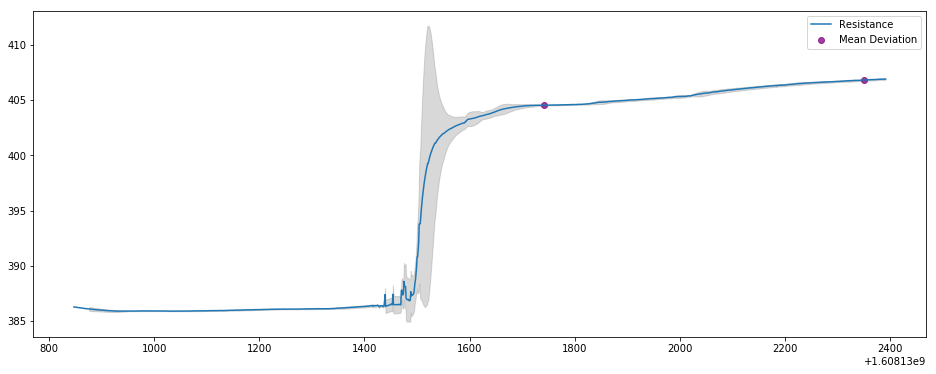

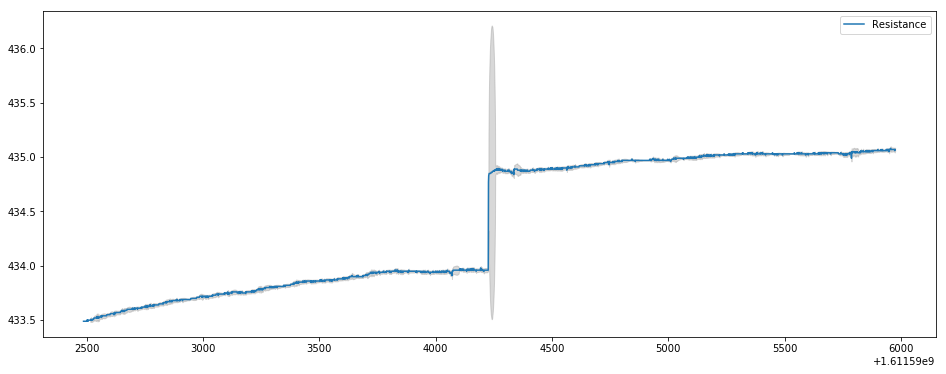

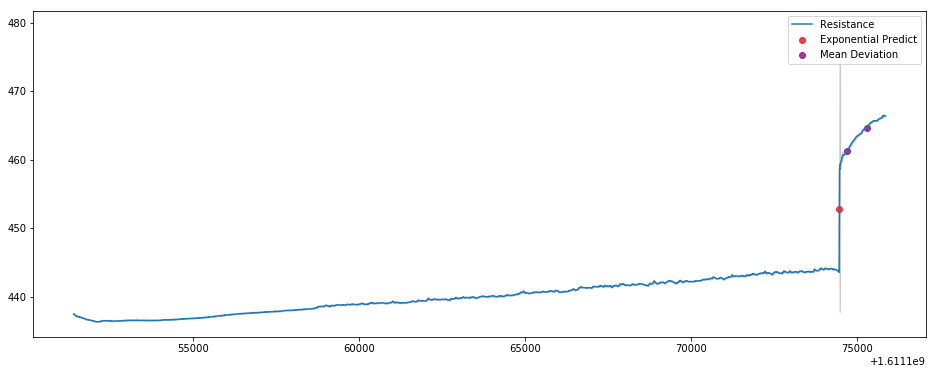

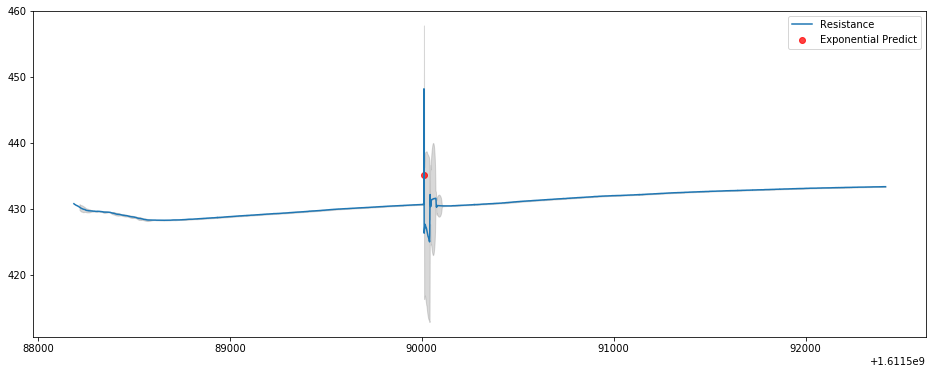

In [42]:
for experiment in json_data:
    if 'Long' not in experiment and 'long' not in experiment:
        data_df = pd.read_csv(json_data[experiment]['Path'], parse_dates=['Time'], dayfirst=True)
        data_df['timestamp'] = data_df['Time'].values.astype(int)/10**9 + 10800
        data_df.index = data_df['timestamp']
        fig, ax = subplots(figsize=(16, 6))
        ax.plot(data_df['Resistance'])
        roll_std = data_df['Resistance'].rolling(window = 5).std()
        ax.fill_between(x = data_df.index, y1 = data_df['Resistance'] - roll_std*3,y2 = data_df['Resistance'] + roll_std*3, alpha = 0.3, color = 'gray')
        detections_df = pd.DataFrame(json_data[experiment]['Detections'])
        colors = ['red', 'purple', 'pink', 'orange']

        for detector in detections_df['detector'].unique():
            plot_data = detections_df[detections_df['detector'] == detector]
            if detector == 'Expo-predict':
                ax.scatter(x = plot_data['timestamp'], y = plot_data['resistance'], c = 'red',label = 'Exponential Predict', alpha = 0.75)
            elif detector == 'Mean-shift':
                ax.scatter(x = plot_data['timestamp'], y = plot_data['resistance'], c = 'purple',label = 'Mean Deviation', alpha = 0.75)
        plt.legend(loc = 'best')
        plt.show()

In [33]:
json_data[experiment]['Detections']

[{'timestamp': 1611273805.7411056,
  'frequency': 5009723.925,
  'resistance': 456.90000000000003,
  'period': [0, 0],
  'time': '',
  'severity': 'severe',
  'detector': 'OneClassSVM',
  'notified': False},
 {'timestamp': 1611273813.742312,
  'frequency': 5009724.025,
  'resistance': 456.89374999999995,
  'period': [0, 0],
  'time': '',
  'severity': 'severe',
  'detector': 'OneClassSVM',
  'notified': False},
 {'timestamp': 1611273805.7411056,
  'frequency': 5009723.925,
  'resistance': 456.90000000000003,
  'period': [0, 0],
  'time': '',
  'severity': 'severe',
  'detector': 'IsolationForest',
  'notified': False},
 {'timestamp': 1611273814.7424254,
  'frequency': 5009724.040000001,
  'resistance': 456.89300000000003,
  'period': [0, 0],
  'time': '',
  'severity': 'severe',
  'detector': 'IsolationForest',
  'notified': False},
 {'timestamp': 1611273824.7427115,
  'frequency': 5009724.130000001,
  'resistance': 456.899,
  'period': [0, 0],
  'time': '',
  'severity': 'severe',
  '

In [25]:
detections_df

,timestamp,frequency,resistance,period,time,severity,detector,notified
0,1.611588e+09,5.009805e+06,430.830000,"[0, 0]",,severe,OneClassSVM,False
1,1.611588e+09,5.009806e+06,430.706000,"[0, 0]",,severe,OneClassSVM,False
2,1.611588e+09,5.009805e+06,430.830000,"[0, 0]",,severe,IsolationForest,False
3,1.611588e+09,5.009806e+06,430.706000,"[0, 0]",,severe,IsolationForest,False
4,1.611588e+09,5.009806e+06,430.548000,"[0, 0]",,severe,IsolationForest,False
5,1.611588e+09,5.009807e+06,430.369000,"[0, 0]",,severe,IsolationForest,False
6,1.611588e+09,5.009808e+06,430.178000,"[0, 0]",,severe,IsolationForest,False
7,1.611588e+09,5.009809e+06,430.106667,"[0, 0]",,severe,IsolationForest,False
8,1.611589e+09,5.009832e+06,428.516000,"[0, 0]",,severe,OneClassSVM,False
9,1.611589e+09,5.009832e+06,428.566667,"[0, 0]",,severe,IsolationForest,False


In [49]:
data_df['timestamp'].describe()

count    3.491000e+03
mean     1.611583e+09
std      1.007878e+03
min      1.611582e+09
25%      1.611583e+09
50%      1.611583e+09
75%      1.611584e+09
max      1.611585e+09
Name: timestamp, dtype: float64

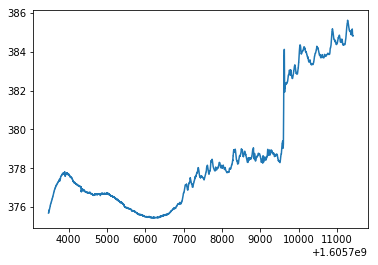

In [54]:
data_df.index = data_df['timestamp']
plt.plot(data_df['Resistance'])

0     2
1     2
2     0
3     0
4     0
5     0
6     0
7     0
8     2
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    2
20    1
21    2
22    0
23    0
24    0
25    0
26    0
27    0
28    0
dtype: int8